# Pronóstico de la evolución de pacientes con diabetes (ANEXOS)

## Descripción del problema real

Los tratamientos médicos están basados en las expectativas de recuperación o el avance de una enfermedad para tomar decisiones. En este caso, un equipo médico desea contar con pronósticos de pacientes con diabetes para tomar decisiones sobre su tratamiento.

## Descripción del problema en términos de los datos

Se desea determinar el progreso de la diabeteis un año hacia adelante a partir de las variables medidas para 442 pacientes. La información está almacenada en el archivo `datos/diabetes.csv`. Las variables medidas son: edad, sexo, indice de masa corporal, presión sanguinea y seis medidas de serum en la sangre. Se desea pronósticar el progreso de la enfermedad a partir de las variables dadas.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de regresión lineal y un modelo de redes neuronales artificiales.

## Requerimientos

Usted debe:

* Determinar cuáles de las variables consideradas son relevantes para el problema.


* Determinar si hay alguna transformación de las variables de entrada o de salida que mejore el pronóstico del modelo.


* Construir un modelo de regresión lineal que sirva como base para construir un modelo de redes neuronales artificiales.



* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

# Desarrollo para enocntrar una red neuronal optima por iteración

## Configuración del ambiende de desarrollo - importación de librerias

Lo primero que se debe hacer es configurar el ambiende de desarrolo, importando las librerias necesarias para trabajar.

In [4]:
##Importar las librerias necesarias para trabajar 
import os
import numpy as np 
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neural_network import MLPRegressor
from statsmodels import robust
from sklearn.feature_selection import RFECV



%matplotlib inline

## Lectura de datos
En primer lugar se leen los datos provenientes del archivo diabetes.cvs facilitado por el profesor. Para esto se hace uso de la libreria pandas (pd) y sus funciones. 

In [5]:
#Extraer los datos de precios de la electricidad

##Este es la direccion donde estan todos los Exceles de donde saldran los datos
ruta  = r'C:\Users\nelson.barco\NFBB\Redes Neuronales\evaluacion-nfbarcob03-master\evaluacion-nfbarcob03-master\datos\diabetes.csv'

dataFrame = pd.read_csv(ruta)
dataFrame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Escalamiento de datos

Como existen valores negativos todos los valors deben escalarse para que estos negativos no alteren el comportamiento del modelo

In [6]:
scaler = MinMaxScaler()
dataFrameScalar = pd.DataFrame(scaler.fit_transform(dataFrame), columns=dataFrame.columns)
dataFrameScalar.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0.392523
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222443,0.166667,0.155763
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496584,0.409091,0.361371
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572936,0.469697,0.563863
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362369,0.333333,0.342679


In [7]:
dataFrameScalar.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.491968,0.468326,0.346107,0.459818,0.451668,0.367725,0.360889,0.291996,0.485557,0.503942,0.396054
std,0.218484,0.499561,0.182567,0.194806,0.169647,0.151460,0.167977,0.182010,0.183364,0.174187,0.240165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320833,0.000000,0.214876,0.309859,0.329657,0.271165,0.237013,0.141044,0.357528,0.382576,0.193146
50%,0.516667,0.000000,0.318182,0.436620,0.436275,0.355578,0.337662,0.282087,0.478057,0.500000,0.359813
75%,0.666667,1.000000,0.465909,0.605634,0.552696,0.462649,0.464286,0.423131,0.610446,0.606061,0.580997
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Desarrollo modelo de redes neuronales en base al modelo de regresión lineal

A continuación se desarrollara un modelo de redes nueronales Regresión no lineal con perceptrones multicapa, se implementara primero con todas las variables del data set y luego con las variables que del mejor modelo escogido en la primera parte. Se probaran varias configuraciones de la red y se escogera la que tenga menor score en la validacion cruzada (cross validation)

Puede que no se encuentre la mejor configuración posible pero se intentara probar muchas combinaciones de funciones de activacion, solver y numero de neuronas y capas ocultas.

Se iteraran modelos con capas ocultas de 1 a 10, neuronas en las capas ocultas de 1 a 12, 4 tipos de algoritmo de activacion y 3 tipos de solver

### Red Neuronal MLP con todas las variables del data set

In [8]:
np.random.seed(0)
activaciones = ['identity', 'logistic', 'tanh', 'relu']
solveres = ['lbfgs', 'sgd', 'adam']

optimal_scores=[]
optimal_capas=None
optimal_neuronas=None
optimal_activacion=None
optimal_solver=None
optimal_model=None

variables=dataFrame.columns
variables=variables[:-1]
x=dataFrameScalar.loc[:,variables]
y=dataFrameScalar.loc[:,['Y']]
xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)

for capas in range (1,10):
    for neuronas in range (1,12):
        for activacion in activaciones:
            for solver in solveres:
                m = MLPRegressor(
                                 hidden_layer_sizes = (neuronas,capas),  # Una capa oculta con una neurona
                                 activation = 'logistic',    #  {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
                                 solver = 'sgd',             #  {‘lbfgs’, ‘sgd’, ‘adam’}
                                 alpha = 0.0,                #
                                 learning_rate_init = 0.1,   # Valor de la tasa de aprendizaje
                                 learning_rate = 'constant', # La tasa no se adapta automáticamente
                                 verbose = False,            # Reporte del proceso de optimización
                                 shuffle = True,             #
                                 tol = 1e-8,                 #
                                 max_iter = 25000,           # Número máximo de iteraciones
                                 momentum = 0.0,             #
                                 nesterovs_momentum = False) #

                m.fit(xEntrenamiento, yEntrenamiento.values.ravel())                                  # Entrena el modelo

                scores = cross_val_score(m, x, y.values.ravel(), cv=5,scoring = 'neg_mean_squared_error')
                
                if optimal_scores==[] or round(abs(optimal_scores.mean()),5)>round(abs(scores.mean()),5):
                    optimal_scores=scores
                    optimal_capas=capas
                    optimal_neuronas=neuronas
                    optimal_activacion=activacion
                    optimal_solver=solver
                    optimal_model=m
                    print('Optimo actual:')
                    print('Numero de capas ocultas: ', optimal_capas)
                    print('Numero de neuronas por capa oculta: ', optimal_neuronas)  
                    print('Algoritmo de activación: ', optimal_activacion)
                    print('Timpo de solver: ',optimal_solver)
                    print('MSE',round(abs(optimal_scores.mean()),5))
                    #print('R^2: {}'.format(optimal_scores(xValidacion, yValidacion.values.ravel())))
                    scores = cross_val_score(optimal_model, x, y.values.ravel(), cv=5)
                    print('Accuracy: {} (+/- {})'.format(abs(optimal_scores.mean()), abs(optimal_scores.std()) * 2))

print('Para el modelo de redes neuronales Regresión no lineal con perceptrones multicapa, la mejor configuración encontrada fue:')
print('Numero de capas ocultas: ', optimal_capas)
print('Numero de neuronas por capa oculta: ', optimal_neuronas)  
print('Algoritmo de activación: ', optimal_activacion)
print('Timpo de solver: ',optimal_solver)

print('MSE',round(abs(optimal_scores.mean()),5))
#print('R^2: {}'.format(optimal_model.score(xValidacion, yValidacion.values.ravel())))
scores = cross_val_score(optimal_model, x, y.values.ravel(), cv=5)
print('Accuracy: {} (+/- {})'.format(abs(optimal_scores.mean()), abs(optimal_scores.std()) * 2))



Optimo actual:
Numero de capas ocultas:  1
Numero de neuronas por capa oculta:  1
Algoritmo de activación:  identity
Timpo de solver:  lbfgs
MSE 0.05807
Accuracy: 0.05806645559701927 (+/- 0.010802893696891837)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Optimo actual:
Numero de capas ocultas:  1
Numero de neuronas por capa oculta:  1
Algoritmo de activación:  identity
Timpo de solver:  sgd
MSE 0.05797
Accuracy: 0.057969361802924856 (+/- 0.010825403268395985)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Optimo actual:
Numero de capas ocultas:  1
Numero de neuronas por capa oculta:  1
Algoritmo de activación:  identity
Timpo de solver:  adam
MSE 0.05337
Accuracy: 0.053366207780879096 (+/- 0.026842841308789465)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

Optimo actual:
Numero de capas ocultas:  1
Numero de neuronas por capa oculta:  1
Algoritmo de activación:  relu
Timpo de solver:  adam
MSE 0.05161
Accuracy: 0.051608777262072844 (+/- 0.02334595172195264)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Optimo actual:
Numero de capas ocultas:  1
Numero de neuronas por capa oculta:  2
Algoritmo de activación:  logistic
Timpo de solver:  sgd
MSE 0.04773
Accuracy: 0.04773211260125935 (+/- 0.029912330481666336)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

Optimo actual:
Numero de capas ocultas:  1
Numero de neuronas por capa oculta:  2
Algoritmo de activación:  relu
Timpo de solver:  sgd
MSE 0.04543
Accuracy: 0.04542637596310556 (+/- 0.025422065850295876)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

Optimo actual:
Numero de capas ocultas:  1
Numero de neuronas por capa oculta:  3
Algoritmo de activación:  relu
Timpo de solver:  lbfgs
MSE 0.04167
Accuracy: 0.041669328218333676 (+/- 0.033868692376966866)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

Optimo actual:
Numero de capas ocultas:  1
Numero de neuronas por capa oculta:  4
Algoritmo de activación:  tanh
Timpo de solver:  sgd
MSE 0.04006
Accuracy: 0.04006141391797713 (+/- 0.026527175661608997)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

Optimo actual:
Numero de capas ocultas:  1
Numero de neuronas por capa oculta:  5
Algoritmo de activación:  relu
Timpo de solver:  adam
MSE 0.03424
Accuracy: 0.03423829770290959 (+/- 0.017907033143595843)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

Optimo actual:
Numero de capas ocultas:  3
Numero de neuronas por capa oculta:  10
Algoritmo de activación:  relu
Timpo de solver:  adam
MSE 0.03389
Accuracy: 0.033889644586107666 (+/- 0.01744722329026659)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

Optimo actual:
Numero de capas ocultas:  6
Numero de neuronas por capa oculta:  7
Algoritmo de activación:  relu
Timpo de solver:  sgd
MSE 0.02946
Accuracy: 0.02945645049568519 (+/- 0.003738514806169718)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

Para el modelo de redes neuronales Regresión no lineal con perceptrones multicapa, la mejor configuración encontrada fue:
Numero de capas ocultas:  6
Numero de neuronas por capa oculta:  7
Algoritmo de activación:  relu
Timpo de solver:  sgd
MSE 0.02946
Accuracy: 0.02945645049568519 (+/- 0.003738514806169718)


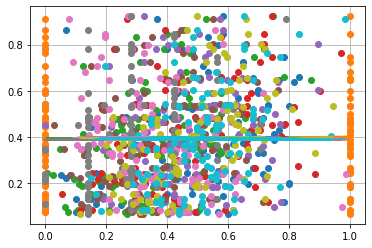

In [28]:
plt.plot(xValidacion, yValidacion, 'o');
plt.grid()
plt.plot(xValidacion, optimal_model.predict(xValidacion), '-');

### Red Neuronal MLP con las variables de la regresión lineal del data set

In [9]:
np.random.seed(0)
activaciones = ['identity', 'logistic', 'tanh', 'relu']
solveres = ['lbfgs', 'sgd', 'adam']

optimal_scores=[]
optimal_capas=None
optimal_neuronas=None
optimal_activacion=None
optimal_solver=None
optimal_model=None

variables=dataFrame.columns
variables=variables[:-1]
x=dataFrameScalar.loc[:,['s5', 'bp', 'bmi', 'sex', 's6','s3']]
y=dataFrameScalar.loc[:,['Y']]
xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)

for capas in range (1,10):
    for neuronas in range (1,12):
        for activacion in activaciones:
            for solver in solveres:
                m = MLPRegressor(
                                 hidden_layer_sizes = (neuronas,capas),  # Una capa oculta con una neurona
                                 activation = 'logistic',    #  {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
                                 solver = 'sgd',             #  {‘lbfgs’, ‘sgd’, ‘adam’}
                                 alpha = 0.0,                #
                                 learning_rate_init = 0.1,   # Valor de la tasa de aprendizaje
                                 learning_rate = 'constant', # La tasa no se adapta automáticamente
                                 verbose = False,            # Reporte del proceso de optimización
                                 shuffle = True,             #
                                 tol = 1e-8,                 #
                                 max_iter = 25000,           # Número máximo de iteraciones
                                 momentum = 0.0,             #
                                 nesterovs_momentum = False) #

                m.fit(xEntrenamiento, yEntrenamiento.values.ravel())                                  # Entrena el modelo

                scores = cross_val_score(m, x, y.values.ravel(), cv=5,scoring = 'neg_mean_squared_error')
                
                if optimal_scores==[] or round(abs(optimal_scores.mean()),5)>round(abs(scores.mean()),5):
                    optimal_scores=scores
                    optimal_capas=capas
                    optimal_neuronas=neuronas
                    optimal_activacion=activacion
                    optimal_solver=solver
                    optimal_model=m
                    print('Optimo actual:')
                    print('Numero de capas ocultas: ', optimal_capas)
                    print('Numero de neuronas por capa oculta: ', optimal_neuronas)  
                    print('Algoritmo de activación: ', optimal_activacion)
                    print('Timpo de solver: ',optimal_solver)
                    print('MSE',round(abs(optimal_scores.mean()),5))
                    #print('R^2: {}'.format(optimal_scores(xValidacion, yValidacion.values.ravel())))
                    scores = cross_val_score(optimal_model, x, y.values.ravel(), cv=5)
                    print('Accuracy: {} (+/- {})'.format(abs(optimal_scores.mean()), abs(optimal_scores.std()) * 2))

print('Para el modelo de redes neuronales Regresión no lineal con perceptrones multicapa, la mejor configuración encontrada fue:')
print('Numero de capas ocultas: ', optimal_capas)
print('Numero de neuronas por capa oculta: ', optimal_neuronas)  
print('Algoritmo de activación: ', optimal_activacion)
print('Timpo de solver: ',optimal_solver)

print('MSE',round(abs(optimal_scores.mean()),5))
#print('R^2: {}'.format(optimal_model.score(xValidacion, yValidacion.values.ravel())))
scores = cross_val_score(optimal_model, x, y.values.ravel(), cv=5)
print('Accuracy: {} (+/- {})'.format(abs(optimal_scores.mean()), abs(optimal_scores.std()) * 2))


Optimo actual:
Numero de capas ocultas:  1
Numero de neuronas por capa oculta:  1
Algoritmo de activación:  identity
Timpo de solver:  lbfgs
MSE 0.05214
Accuracy: 0.0521354914149027 (+/- 0.023310132268963356)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Optimo actual:
Numero de capas ocultas:  1
Numero de neuronas por capa oculta:  1
Algoritmo de activación:  logistic
Timpo de solver:  lbfgs
MSE 0.03966
Accuracy: 0.03965570673710324 (+/- 0.027370668431411914)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Optimo actual:
Numero de capas ocultas:  1
Numero de neuronas por capa oculta:  9
Algoritmo de activación:  relu
Timpo de solver:  adam
MSE 0.03606
Accuracy: 0.036056136499737046 (+/- 0.02742824055201421)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

Optimo actual:
Numero de capas ocultas:  1
Numero de neuronas por capa oculta:  10
Algoritmo de activación:  logistic
Timpo de solver:  adam
MSE 0.03593
Accuracy: 0.03592712624617971 (+/- 0.02747023272116181)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

Optimo actual:
Numero de capas ocultas:  2
Numero de neuronas por capa oculta:  8
Algoritmo de activación:  logistic
Timpo de solver:  lbfgs
MSE 0.03508
Accuracy: 0.0350795658141117 (+/- 0.025582412531056954)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

Optimo actual:
Numero de capas ocultas:  2
Numero de neuronas por capa oculta:  9
Algoritmo de activación:  logistic
Timpo de solver:  adam
MSE 0.02904
Accuracy: 0.029043380614759834 (+/- 0.004019913668541137)


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Para el modelo de redes neuronales Regresión no lineal con perceptrones multicapa, la mejor configuración encontrada fue:
Numero de capas ocultas:  2
Numero de neuronas por capa oculta:  9
Algoritmo de activación:  logistic
Timpo de solver:  adam
MSE 0.02904
Accuracy: 0.029043380614759834 (+/- 0.004019913668541137)


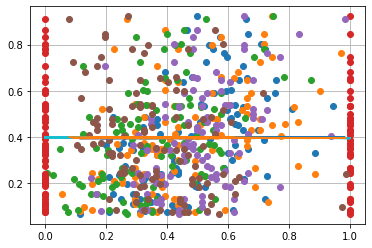

In [10]:
plt.plot(xValidacion, yValidacion, 'o');
plt.grid()
plt.plot(xValidacion, optimal_model.predict(xValidacion), '-');

## Conclusión segunda parte (anexos)

Para el modelo de redes neuronales Regresión no lineal con perceptrones multicapa y utilizando todas las variables del dataset, la mejor configuración encontrada fue:

- Numero de capas ocultas:  6
- Numero de neuronas por capa oculta:  7
- Algoritmo de activación:  relu
- Timpo de solver:  sgd
- MSE 0.02946
- Accuracy: 0.02945645049568519 (+/- 0.003738514806169718)

Para el modelo de redes neuronales Regresión no lineal con perceptrones multicapa y utilizando las variables de la regresión lineal ('s5', 'bp', 'bmi', 'sex', 's6','s3'), la mejor configuración encontrada fue:

- Numero de capas ocultas:  2
- Numero de neuronas por capa oculta:  9
- Algoritmo de activación:  logistic
- Timpo de solver:  adam
- MSE 0.02904
- Accuracy: 0.029043380614759834 (+/- 0.004019913668541137)
